# Problem Statement:
---
I'm a part of a data science team at a company, and I have the objective of determining if a certain employee will quit or stay at the company using some features  like their satisfaction level and monthly work hours.

# Importing The Libraries:
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import warnings
import matplotlib.image as image
import pandas_profiling

In [2]:
# Basic touches for a better view:
%matplotlib inline
plt.style.use('ggplot')
warnings.simplefilter('ignore')

# Exploratory Data Analysis:
---

In [3]:
# Loading the data:
df = pd.read_csv('../Datasets/employee_data.csv')

In [4]:
# Generating a report of the data:
df.profile_report(title='Data Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0, 0.5, 'Frequency Of Turnover')

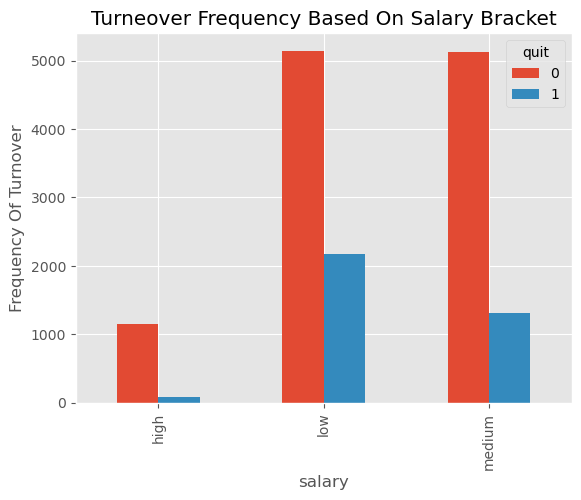

In [5]:
# Plotting The Catagorical Variables:
pd.crosstab(df.salary, df.quit).plot.bar()
plt.title('Turneover Frequency Based On Salary Bracket')
plt.ylabel('Frequency Of Turnover')

Text(0, 0.5, 'Frequency Of Turnover')

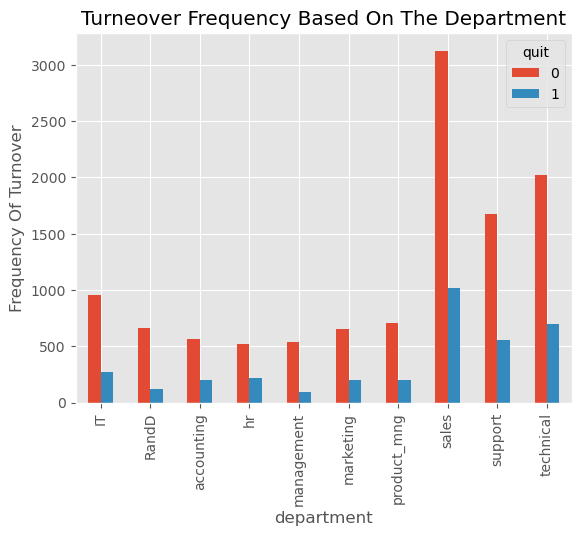

In [6]:
pd.crosstab(df.department, df.quit).plot.bar()
plt.title('Turneover Frequency Based On The Department')
plt.ylabel('Frequency Of Turnover')

Text(0, 0.5, 'Frequency Of Turnover')

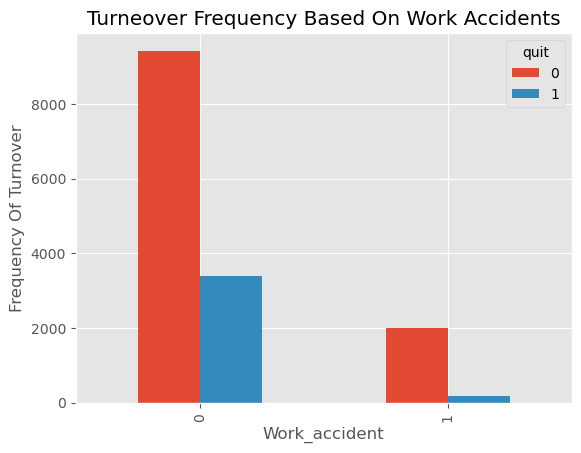

In [7]:
pd.crosstab(df['Work_accident'], df.quit).plot.bar()
plt.title('Turneover Frequency Based On Work Accidents')
plt.ylabel('Frequency Of Turnover')

Text(0, 0.5, 'Frequency Of Turnover')

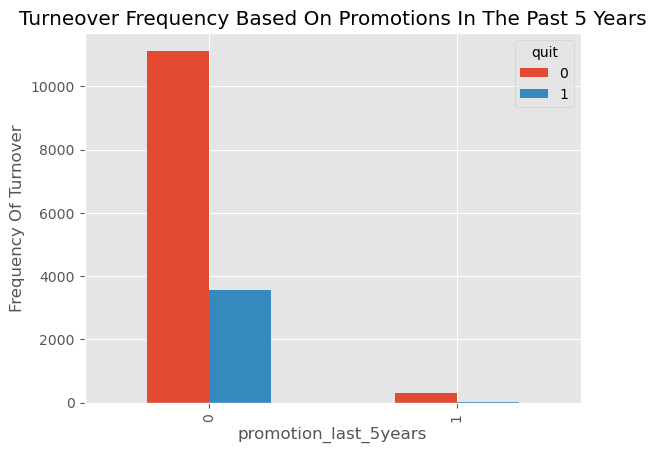

In [8]:
# Plotting The Catagorical Variables:
pd.crosstab(df['promotion_last_5years'], df.quit).plot.bar()
plt.title('Turneover Frequency Based On Promotions In The Past 5 Years')
plt.ylabel('Frequency Of Turnover')

# Encoding Categorical Variables:
---

In [9]:
cat_var = ['promotion_last_5years', 'salary', 'Work_accident', 'department']
for var in cat_var:
    cat_list = pd.get_dummies(df[var], prefix=var)
    df = df.join(cat_list)

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# Droping the original columns:
df.drop(columns=cat_var,inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,quit,promotion_last_5years_0,promotion_last_5years_1,salary_high,salary_low,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Visualising Class Imbalance:
-----

In [12]:
from yellowbrick.target import ClassBalance

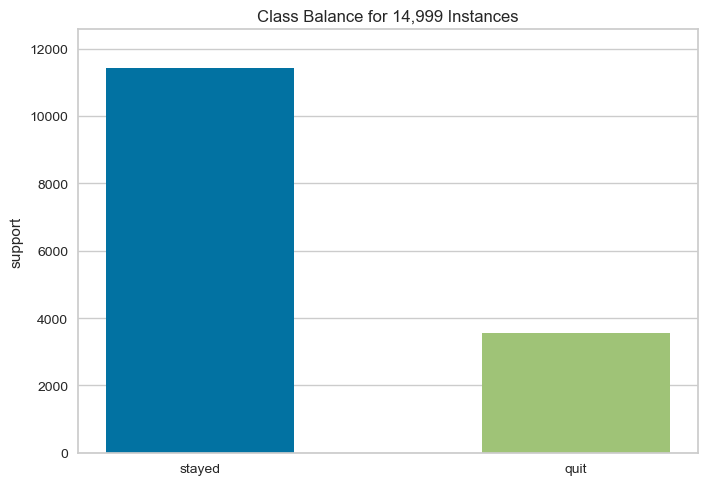

<AxesSubplot:title={'center':'Class Balance for 14,999 Instances'}, ylabel='support'>

In [13]:
visualizer = ClassBalance(labels=['stayed', 'quit']).fit(df.quit)
visualizer.show()

* Note that the classes  are inbalanced. Therefore, stratified smapling will be used in order to represent each class equaly.

# Splitting The Data Into Train/Test (80/20):
---

In [14]:
from sklearn.model_selection import train_test_split
x = df.loc[:, df.columns != 'quit']
y = df.quit
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [15]:
x_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years_0,promotion_last_5years_1,salary_high,salary_low,salary_medium,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
11021,0.56,0.92,4,224,3,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
13779,0.57,0.69,3,212,8,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
12638,0.84,0.83,4,227,5,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3540,0.87,0.62,3,176,3,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4825,0.95,0.53,4,162,3,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,0.82,0.62,4,267,3,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
10071,0.78,0.96,3,217,3,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4644,0.71,0.79,3,189,3,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
10703,0.84,0.64,2,211,3,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Building an Interactive Decision Tree Classifier
---

In [16]:
# Importing relevant modules:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
from IPython.display import Image

In [17]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1,max=5,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)
              ):
    
    model = DecisionTreeClassifier(criterion=crit,
                                       splitter=split,
                                       max_depth=depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf
                                      )
    model.fit(x_train, y_train)
    
    print(f'Decision Tree Training Accuracy: {accuracy_score(model.predict(x_train), y_train)}')
    print(f'Decision Tree Testing Accuracy: {accuracy_score(model.predict(x_test), y_test)}')
    
    graph =Source(tree.export_graphviz(model, 
                                       out_file=None,
                                       feature_names=x_train.columns,
                                       class_names=['stayed', 'quit'],
                                       filled=True
                                       ))
    display(Image(data=graph.pipe(format='png')))

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Building an Interactive Random Forest Classifier:
---

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [18]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['True', 'False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    model = RandomForestClassifier(criterion=crit,
                                   bootstrap=bootstrap,
                                   n_estimators=forests,
                                   max_depth=depth,
                                   min_samples_split=min_split,
                                   min_samples_leaf=min_leaf,
                                   n_jobs=1,
                                   verbose=False
                                   ).fit(x_train, y_train)
    
    print(f'Random Forests Training Accuracy: {accuracy_score(model.predict(x_train), y_train)}')
    print(f'Random Forests Testing Accuracy: {accuracy_score(model.predict(x_test), y_test)}')
    num_tree = model.estimators_[0]
    print('Visualizing The First Tree')
    
    graph =Source(tree.export_graphviz(num_tree, 
                                       out_file=None,
                                       feature_names=x_train.columns,
                                       class_names=['stayed', 'quit'],
                                       filled=True
                                       ))
    display(Image(data=graph.pipe(format='png')))

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…